In [29]:
## 纤维长度
rm(list = ls())
setwd('F:/Multip_species_3Dgenome/Figure6/Figure 6')
library(ggplot2)
library(ggrepel)
df <- read.csv("fiber_length.txt", sep = '\t')
df <- within(df, days <- factor(days, levels = c("8DPA", "12DPA", "16DPA", "20DPA")))
with(df, levels(days))
head(df)

[1] "8DPA"  "12DPA" "16DPA" "20DPA"

,values,tags,days
,<dbl>,<fct>,<fct>
1,0.70,short,8DPA
2,1.84,short,12DPA
3,2.25,short,16DPA
4,2.60,short,20DPA
5,0.53,long,8DPA
6,1.25,long,12DPA


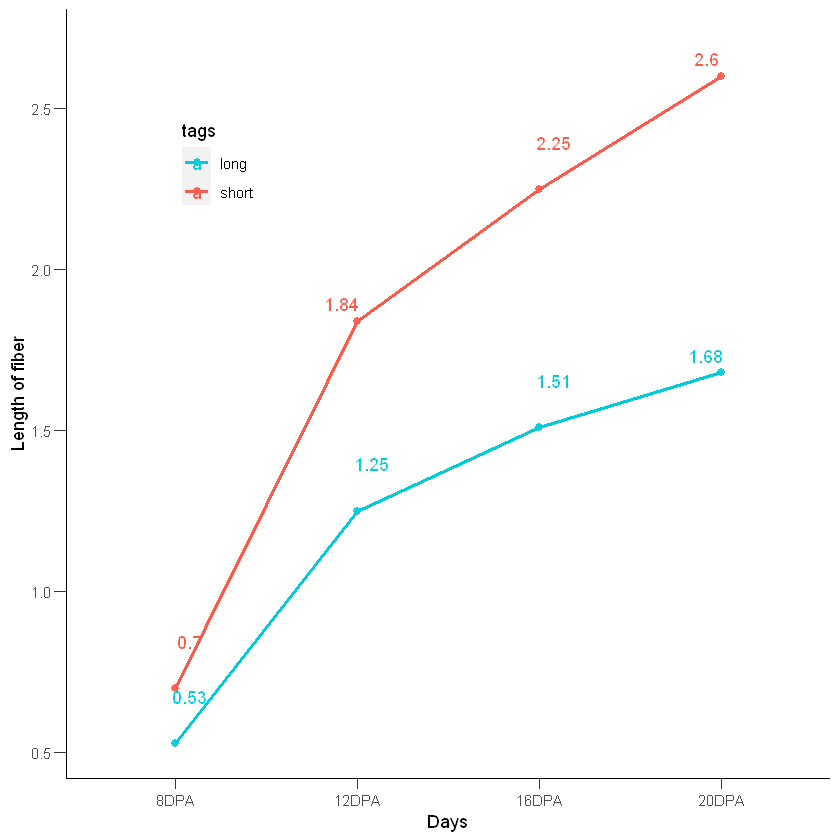

In [57]:
fg <- ggplot(df, aes(x = days, y = values, group=tags, color=tags)) + 
labs(x="Days", y="Length of fiber", fill=NULL)+
theme(panel.background = element_blank(),
      panel.grid = element_blank(),
      axis.line=element_line(linetype=1,color="black"),
      axis.ticks.length = unit(0.25, "cm"),
      legend.position = c(0.2, 0.8)
     )+
geom_line(size=1)+
geom_point(size=2, alpha=0.9)+
geom_text_repel(aes(x = days, y = values+0.1, label = values))+
scale_color_manual(values = c("#FA5B4B","#FA5B4B"))
fg
ggsave(plot = fg, filename = "fiber_length.pdf", height = 3, width = 3)

[1] "0DPA"  "5DPA"  "10DPA" "20DPA"

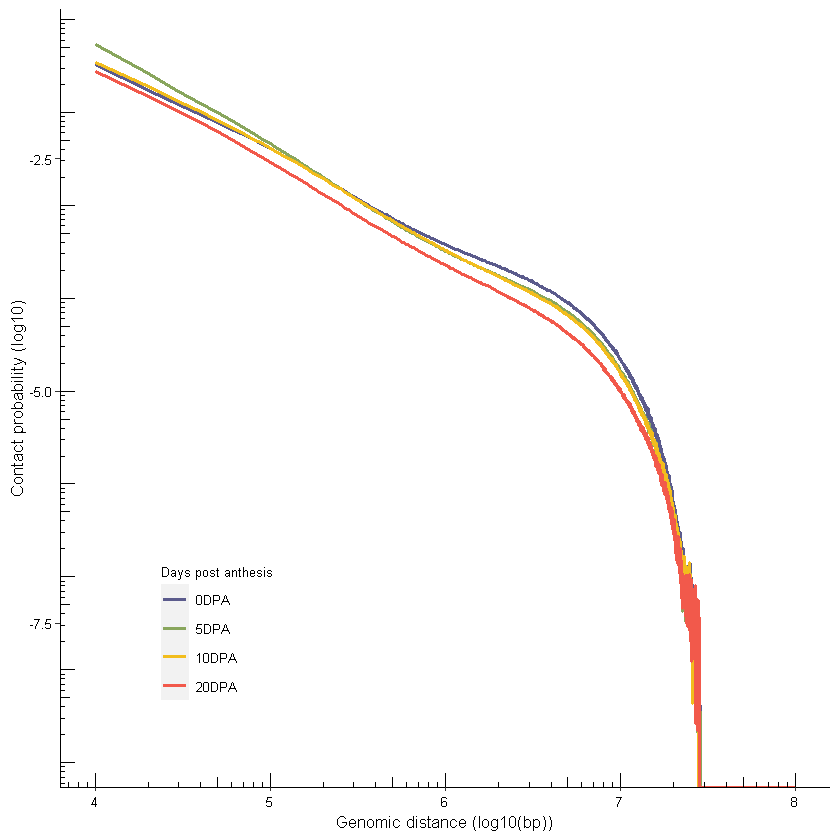

In [6]:
### 分析基因贫瘠区和基因富集区IDE的变化
rm(list=ls())
setwd('F:/fiber/airticle/GB_modification/IDE')
library(ggplot2)
ide_data <- read.csv('Rich_region_ide_adjust.txt', sep = '\t', header = T)
ide_data <- within(ide_data, days <- factor(days, levels = c("0DPA", "5DPA", "10DPA", "20DPA")))
with(ide_data, levels(days))
#head(ide_data)
#dpa0_at <- degree_data[(degree_data$days=='0DPA') & (degree_data$subgenome == 'At'),]
ide <- ggplot(ide_data, aes(x=log10(bins*10000), y=log10((ide*100)), group=days, color=days)) +
  geom_line(size=1)+
  #geom_smooth(method = 'loess',se = FALSE )+
  #geom_point()+
  labs(x="Genomic distance (log10(bp))", y='Contact probability (log10)') +   #不要标签
  #geom_smooth(se = FALSE) +
  #facet_grid(subgenome~days)+
  theme(
    panel.background = element_blank(), #去掉背景色
    panel.grid.major = element_blank(), #去掉网格
    panel.grid.minor = element_blank(),
    axis.line=element_line(linetype=1,color="black"),  #添加轴线   
    axis.text=element_text(size=8,angle=0,color="Black"), #设置轴字体
    legend.text = element_text(size=8),
    legend.title = element_text(size=8),
    axis.title =element_text(size=10), #设置标签字体
    legend.position=c(0.2, 0.2) #调整图例,
  ) +
  guides(color=guide_legend(title = "Days post anthesis"))+
  scale_color_manual(values=c("#5B5B8C","#89A65D",'#F2BD1D', '#F2594B')) +
  annotation_logticks() 
ide
ggsave(plot = ide, filename = "Rich_region_ide.pdf", height = 3, width = 3)